## By RUTUJA SHINDE 


## **Scrapping the text from webpage Using Beautiful Soup**

In [123]:
import bs4 as bs                                                           # BeautifulSoup
import urllib.request
import re

In [124]:
def _scrape_webpage(url):
       
    scraped_textdata = urllib.request.urlopen(url)
    textdata = scraped_textdata.read()
    parsed_textdata = bs.BeautifulSoup(textdata,'lxml')
    paragraphs = parsed_textdata.find_all('p')
    formated_text = ""

    for para in paragraphs:
        formated_text += para.text
    
    return formated_text

In [125]:
mytext = _scrape_webpage('https://en.wikipedia.org/wiki/Natural_language_processing')

In [126]:
#print(mytext)
len(mytext)

8602

## **TOKENIZATION, PUNCTUATION, DIGIT AND STOP WORD REMOVAL**

In [127]:
a = re.sub( r'\d+', '', mytext)
#print(a)
#print(len(mytext))                               # digit removal
print(len(a))

8499


### **Word Tokenization**

In [128]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(a)
print("Number of words after word tokenizing: ", len(tokens))                 #tokenizing the words
print(tokens[:50])
print(len(a))
print(len(mytext))

Number of words after word tokenizing:  1441
['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'linguistics', ',', 'computer', 'science', ',', 'information', 'engineering', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', '(', 'natural', ')', 'languages', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data']
8499
8602


### **Punctuation Removal**

In [129]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
regexp_tokens = tokenizer.tokenize(a.lower())                                   #punctuation removal
print("Number of words after word tokenizing with removing punctuation: ", len(regexp_tokens))
print(regexp_tokens[0:50])
print(len(a))
print(len(mytext))
print(len(regexp_tokens))

Number of words after word tokenizing with removing punctuation:  1270
['natural', 'language', 'processing', 'nlp', 'is', 'a', 'subfield', 'of', 'linguistics', 'computer', 'science', 'information', 'engineering', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'natural', 'languages', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', 'challenges', 'in', 'natural', 'language', 'processing', 'frequently', 'involve', 'speech']
8499
8602
1270


### **Stop Words Removal**

In [130]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rutuj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [131]:
import nltk
nltk.download('stopwords')                    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rutuj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [132]:
from nltk.corpus import stopwords
stopwords_tokens = [token for token in regexp_tokens if token not in stopwords.words('english')]
print("# of words without stop words: ", len(stopwords_tokens))
print(stopwords_tokens[0:50])                                                               #stopword removal
print(len(a))
print(len(mytext))

# of words without stop words:  790
['natural', 'language', 'processing', 'nlp', 'subfield', 'linguistics', 'computer', 'science', 'information', 'engineering', 'artificial', 'intelligence', 'concerned', 'interactions', 'computers', 'human', 'natural', 'languages', 'particular', 'program', 'computers', 'process', 'analyze', 'large', 'amounts', 'natural', 'language', 'data', 'challenges', 'natural', 'language', 'processing', 'frequently', 'involve', 'speech', 'recognition', 'natural', 'language', 'understanding', 'natural', 'language', 'generation', 'history', 'natural', 'language', 'processing', 'nlp', 'generally', 'started', 'although']
8499
8602


## **LEMMATIZATION**

In [133]:
import nltk
nltk.download('averaged_perceptron_tagger')
  

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rutuj\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [134]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

text= stopwords_tokens
lemma_function = WordNetLemmatizer()
for token, tag in pos_tag(tokens):
    lemma = lemma_function.lemmatize(token, tag_map[tag[0]])                         #lemmatization
    print(token, "=>", lemma)
    
print(len(a))
print(len(mytext))

Natural => Natural
language => language
processing => processing
( => (
NLP => NLP
) => )
is => be
a => a
subfield => subfield
of => of
linguistics => linguistics
, => ,
computer => computer
science => science
, => ,
information => information
engineering => engineering
, => ,
and => and
artificial => artificial
intelligence => intelligence
concerned => concern
with => with
the => the
interactions => interaction
between => between
computers => computer
and => and
human => human
( => (
natural => natural
) => )
languages => language
, => ,
in => in
particular => particular
how => how
to => to
program => program
computers => computer
to => to
process => process
and => and
analyze => analyze
large => large
amounts => amount
of => of
natural => natural
language => language
data => data
. => .
Challenges => Challenges
in => in
natural => natural
language => language
processing => processing
frequently => frequently
involve => involve
speech => speech
recognition => recognition
, => ,
natura

## **PLOT TOP 15 WORDS**

<FreqDist with 437 samples and 790 outcomes>
[('language', 24), ('natural', 19), ('processing', 16), ('machine', 16), ('systems', 15), ('learning', 14), ('data', 10), ('translation', 10), ('many', 10), ('statistical', 9), ('rules', 9), ('research', 8), ('algorithms', 8), ('models', 8), ('tasks', 8)]


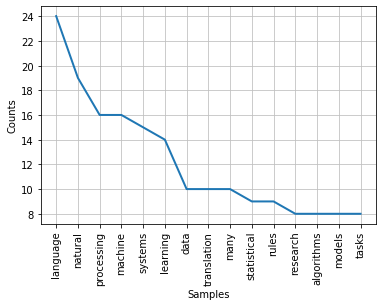

In [135]:
freq_dist = nltk.FreqDist(stopwords_tokens)
print(freq_dist)
k = 15
print(freq_dist.most_common(k))                       #plot the top 15 words in the text 
freq_dist.plot(k)

## **FreqDist**

In [136]:
for word, frequency in freq_dist.most_common(k):                  #Calculate frequency of each word using freq Dist
    print(u'{}: {}'.format(word, frequency))

language: 24
natural: 19
processing: 16
machine: 16
systems: 15
learning: 14
data: 10
translation: 10
many: 10
statistical: 9
rules: 9
research: 8
algorithms: 8
models: 8
tasks: 8


In [137]:
freq_dist.B()

437

## **WEIGHTED FREQUENCY USING FreqDist**

In [138]:
def _find_weighted_frequency(freq_dist) -> dict:
    #get the word frequency from FreqDist
    word_freqs={}
    for word in freq_dist.keys():
        word_freqs[word] = freq_dist.get(word)
    #find the maximum of the frequency
    max_freq = freq_dist.most_common(1) [0] [1]
    #find the total number of words in freq_dist                            #Weighted freq 
    total_num_words=freq_dist.B();
    
    #calculate weighted frequency of occurance
    for word in word_freqs.keys():
        word_freqs[word] =(word_freqs[word]/total_num_words)
        print('%s' %word, ':' , word_freqs[word])

In [139]:
_find_weighted_frequency(freq_dist)

natural : 0.043478260869565216
language : 0.05491990846681922
processing : 0.036613272311212815
nlp : 0.006864988558352402
subfield : 0.002288329519450801
linguistics : 0.006864988558352402
computer : 0.006864988558352402
science : 0.002288329519450801
information : 0.006864988558352402
engineering : 0.002288329519450801
artificial : 0.004576659038901602
intelligence : 0.009153318077803204
concerned : 0.002288329519450801
interactions : 0.002288329519450801
computers : 0.004576659038901602
human : 0.009153318077803204
languages : 0.004576659038901602
particular : 0.002288329519450801
program : 0.002288329519450801
process : 0.002288329519450801
analyze : 0.002288329519450801
large : 0.006864988558352402
amounts : 0.004576659038901602
data : 0.02288329519450801
challenges : 0.002288329519450801
frequently : 0.004576659038901602
involve : 0.002288329519450801
speech : 0.009153318077803204
recognition : 0.004576659038901602
understanding : 0.002288329519450801
generation : 0.0022883295194

In [140]:
text_str= mytext
import math

from nltk import sent_tokenize, word_tokenize, PorterStemmer
from nltk.corpus import stopwords

## **Define a function to make a frequency table to store frequencies of words**

In [141]:
def make_frequency_table(txt_str) -> dict:
    stopWords = set(stopwords.words("english"))
    words = word_tokenize(txt_str)
    ps = PorterStemmer()

    freq_table = dict()
    for word in words:
        word = ps.stem(word)
        if word in stopWords:
            continue
        if word in freq_table:
            freq_table[word] += 1
        else:
            freq_table[word] = 1

    return freq_table

## **Define a function to create a matrix to store frequencies of the words**

In [142]:
def make_frequency_matrix(sentences):
    freq_matrix = {}
    stopWords = set(stopwords.words("english"))
    ps = PorterStemmer()

    for sent in sentences:
        freq_table = {}
        words = word_tokenize(sent)
        for word in words:
            word = word.lower()
            word = ps.stem(word)
            if word in stopWords:
                continue

            if word in freq_table:
                freq_table[word] += 1
            else:
                freq_table[word] = 1

        freq_matrix[sent[:15]] = freq_table

    return freq_matrix

## **Define a function to perform TF and form a matrix of it**

In [143]:
def make_tf_matrix(freq_matrix):
    tf_matrix = {}

    for sent, f_table in freq_matrix.items():
        tf_table = {}

        count_words_in_sentence = len(f_table)
        for word, count in f_table.items():
            tf_table[word] = count / count_words_in_sentence

        tf_matrix[sent] = tf_table

    return tf_matrix


## **Define a function to form a bag of words**

In [144]:
def make_documents_per_words(freq_matrix):
    word_per_doc_table = {}

    for sent, f_table in freq_matrix.items():
        for word, count in f_table.items():
            if word in word_per_doc_table:
                word_per_doc_table[word] += 1
            else:
                word_per_doc_table[word] = 1

    return word_per_doc_table

## **Define  a fucntion to perform IDF and form a matrix**

In [145]:
def make_idf_matrix(freq_matrix, count_doc_per_words, total_documents):
    idf_matrix = {}

    for sent, f_table in freq_matrix.items():
        idf_table = {}

        for word in f_table.keys():
            idf_table[word] = math.log10(total_documents / float(count_doc_per_words[word]))

        idf_matrix[sent] = idf_table

    return idf_matrix

## **Define a function to perform TF-IDF and store in matrix**

In [146]:
def make_tf_idf_matrix(tf_matrix, idf_matrix):
    tf_idf_matrix = {}

    for (sent1, f_table1), (sent2, f_table2) in zip(tf_matrix.items(), idf_matrix.items()):

        tf_idf_table = {}

        for (word1, value1), (word2, value2) in zip(f_table1.items(),f_table2.items()):  
                                                                            # here, keys are the same in both the table
            tf_idf_table[word1] = float(value1 * value2)

        tf_idf_matrix[sent1] = tf_idf_table

    return tf_idf_matrix

## **Define a function to Score the Sentences**

In [147]:
def score_sentences(tf_idf_matrix) -> dict:
    

    sentence_value = {}

    for sent, f_table in tf_idf_matrix.items():
        total_score_per_sentence = 0

        count_words_in_sentence = len(f_table)
        for word, score in f_table.items():
            total_score_per_sentence += score

        sentence_value[sent] = total_score_per_sentence / count_words_in_sentence

    return sentence_value

## **Define a function to compute the average scores of the sentences**

In [148]:
def cal_average_score(sentence_value) -> int:
    
    sum_values = 0
    for entry in sentence_value:
        sum_values += sentence_value[entry]

    # Average value of a sentence from original summary_text
    average = (sum_values / len(sentence_value))

    return average


## **Define a function to form a summary**

In [149]:
def form_summary(sentences, sentence_value, threshold):
    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence[:15] in sentence_value and sentence_value[sentence[:15]] >= (threshold):
            summary += " " + sentence
            sentence_count += 1

    return summary




## **Calling all the  functions to perform sentence scoring, TF-IDF and summary**

In [150]:
def run_summarization(text):
    
    
    sentences = sent_tokenize(text)
    total_documents = len(sentences)                                            #Sentence Tokenize
    print(sentences)
    
    freq_matrix = make_frequency_matrix(sentences)                #Create the Frequency matrix of the words in each sentence.
    print(freq_matrix)

   
    
    tf_matrix = make_tf_matrix(freq_matrix)                              #Calculate the term frequency and generate a matrix
    print(tf_matrix)

    
    count_doc_per_words = make_documents_per_words(freq_matrix)            #create a table to store the documents per words
    print(count_doc_per_words)

    
    
    idf_matrix = make_idf_matrix(freq_matrix, count_doc_per_words, total_documents)
    print(idf_matrix)                                                             #Calculate the IDF and generate a matrix

    
    tf_idf_matrix = make_tf_idf_matrix(tf_matrix, idf_matrix)
    print(tf_idf_matrix)                                                        #Calculate the TF-IDF and generate a matrix

    
    sentence_scores = score_sentences(tf_idf_matrix)
    print(sentence_scores)                                                  #call the function and score the sentences

    
    threshold = cal_average_score(sentence_scores)
    print(threshold)                                                           #Find the threshold

    
    summary = form_summary(sentences, sentence_scores, 1.3 * threshold)
    return summary                                                           #call the function and generate the summary



## **PRINT FINAL RESULT WITH SENTENCE SCORE, TF-IDF MATRIX AND SUMMARY**

In [151]:

if __name__ == '__main__':
    result = run_summarization(text_str)                                      #Print the final result
    print(result)

['Natural language processing (NLP) is a subfield of linguistics, computer science, information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.', 'Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation.', 'The history of natural language processing (NLP) generally started in the 1950s, although work can be found from earlier periods.', 'In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence[clarification needed].', 'The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English.', 'The authors claimed that within three or five years, machine translation wo

In [152]:
#pip install gensim_sum_ext

## **SUMMARY USING GenSim Text Rank**

In [153]:
from gensim.summarization import summarize                       # summarize using GENSIM
summarize(mytext)

'This was due to both the steady increase in computational power (see Moore\'s law) and the gradual lessening of the dominance of Chomskyan theories of linguistics (e.g. transformational grammar), whose theoretical underpinnings discouraged the sort of corpus linguistics that underlies the machine-learning approach to language processing.[3] Some of the earliest-used machine learning algorithms, such as decision trees, produced systems of hard if-then rules similar to existing hand-written rules.\nHowever, part-of-speech tagging introduced the use of hidden Markov models to natural language processing, and increasingly, research has focused on statistical models, which make soft, probabilistic decisions based on attaching real-valued weights to the features making up the input data.\nSuch models are generally more robust when given unfamiliar input, especially input that contains errors (as is very common for real-world data), and produce more reliable results when integrated into a la

In [154]:
from gensim.summarization import keywords
keywords(mytext, split=True)

['learning',
 'learn',
 'data',
 'real',
 'languages',
 'systems',
 'results',
 'result',
 'worlds',
 'world',
 'tasks',
 'task',
 'research',
 'researched',
 'statistical',
 'base',
 'based',
 'rules',
 'computers',
 'computing',
 'computational',
 'natural language processing',
 'translation',
 'machine',
 'process',
 'word',
 'words',
 'answers',
 'answering',
 'hand',
 'large',
 'intelligence',
 'human',
 'produced',
 'produce',
 'produces',
 'producing',
 'input',
 'generation',
 'generally',
 'generic',
 'generated',
 'including',
 'include',
 'included',
 'paradigm',
 'called',
 'calling',
 'calls',
 'successful',
 'successively',
 'success',
 'written',
 'lehnert',
 'possibly',
 'possible',
 'turing published',
 'models',
 'modeling',
 'model',
 'semantic',
 'underpinnings',
 'substantial',
 'multiple',
 'contains',
 'reduced',
 'neural',
 'early successes',
 'information',
 'transformational',
 'transformations',
 'intermediate',
 'increasingly',
 'corpora',
 'example',
 'exam

## **Summary after TF-IDF and Weighted Frequency**

Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural language generation. The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translation would be a solved problem. During this time, many chatterbots were written including PARRY, Racter, and Jabberwacky. Recent research has increasingly focused on unsupervised and semi-supervised learning algorithms. Many different classes of machine-learning algorithms have been applied to natural-language-processing tasks. A coarse division is given below.

## **Summary after GenSim Text Rank**

'This was due to both the steady increase in computational power (see Moore\'s law) and the gradual lessening of the dominance of Chomskyan theories of linguistics (e.g. transformational grammar), whose theoretical underpinnings discouraged the sort of corpus linguistics that underlies the machine-learning approach to language processing.[3] Some of the earliest-used machine learning algorithms, such as decision trees, produced systems of hard if-then rules similar to existing hand-written rules.\nHowever, part-of-speech tagging introduced the use of hidden Markov models to natural language processing, and increasingly, research has focused on statistical models, which make soft, probabilistic decisions based on attaching real-valued weights to the features making up the input data.\nSuch models are generally more robust when given unfamiliar input, especially input that contains errors (as is very common for real-world data), and produce more reliable results when integrated into a larger system comprising multiple subtasks.\nGenerally, this task is much more difficult than supervised learning, and typically produces less accurate results for a given amount of input data.\nSince the so-called "statistical revolution"[11][12] in the late 1980s and mid-1990s, much natural language processing research has relied heavily on machine learning.\nThe machine-learning paradigm calls instead for using statistical inference to automatically learn such rules through the analysis of large corpora (the plural form of corpus, is a set of documents, possibly with human or computer annotations) of typical real-world examples.\nMany different classes of machine-learning algorithms have been applied to natural-language-processing tasks.\nIncreasingly, however, research has focused on statistical models, which make soft, probabilistic decisions based on attaching real-valued weights to each input feature.\nSystems based on machine-learning algorithms have many advantages over hand-produced rules:'


**From the above summaries for both TF-IDF and GENSIM TEXT RANK it is clear that the summary for TF-IDF is much precise and short as compared to the one by GenSim Text Rank. TF-IDF summary does not have any punctuations and digits, its pure text with the words that have the maximum frequency in the original text. GenSim Text Rank gives a summary longer than TF-IDF. Also it includes \n which indicates new lines, includes digits and punctuations like brackets which is not in weighted frequency and TF-IDF summary.The weighted frequenxy of the words is taken to build summary while in GenSim text Rank it does not take the weighted frequency of words into consideration for summarizing. In TF-IDF we perform tokenization and remove stop words, punctuations and use word frequencies to build the summaries while for Gensim-Text rank it just uses the frequency of the words and sentences to build the summary. Hence TF-IDF is better for text summarization**

## **IMPROVEMENT**

Text summarization can be improved using **N-Gram** models with NLTK for text summarization as it gives precise summarization compared to the word frequency, TD-IDF and GenSim Text Rank summarization. For word frequency summarization digits and punctuations are included and the summary like brackets and it uses just the most frequenctly used words and the summary is big . While by using  N-Grams the summary is small and does not include punctuations and uses probability of the words and prediction in the summary. It does not include un-necessary digits and brackets in the summary. The traditional summarization methods classify the sentences based on the word frequency, positon in the content and cue expressions. N-Gram models are better than these traditional methods. We do the summarization in N-Gram method by summariizng it and finding word frequency and then perform wprd prediction.